<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Проверка-зависимости-для-определения-эффективности-обогащения" data-toc-modified-id="Проверка-зависимости-для-определения-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка зависимости для определения эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-отсутствующих-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-отсутствующих-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, отсутствующих в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов" data-toc-modified-id="Изменение-концентрации-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов</a></span></li><li><span><a href="#Исследование-размеров-гранул-сырья" data-toc-modified-id="Исследование-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование размеров гранул сырья</a></span></li><li><span><a href="#Определение-суммарной-концентрации-веществ" data-toc-modified-id="Определение-суммарной-концентрации-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Определение суммарной концентрации веществ</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Преобразование-данных" data-toc-modified-id="Преобразование-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Преобразование данных</a></span></li><li><span><a href="#Функция-симметричного-среднего-абсолютного-процентного-отклонения" data-toc-modified-id="Функция-симметричного-среднего-абсолютного-процентного-отклонения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Функция симметричного среднего абсолютного процентного отклонения</a></span></li><li><span><a href="#Модель-рандомного-леса" data-toc-modified-id="Модель-рандомного-леса-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель рандомного леса</a></span></li><li><span><a href="#Регрессионные-модели" data-toc-modified-id="Регрессионные-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Регрессионные модели</a></span></li><li><span><a href="#Градиентный-бустинг" data-toc-modified-id="Градиентный-бустинг-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Градиентный бустинг</a></span></li><li><span><a href="#Стохастический-градиентный-спуск" data-toc-modified-id="Стохастический-градиентный-спуск-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Стохастический градиентный спуск</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Необходимо подготовить эффективную модель для некой компании разрабатывающей решения для промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В использовании имеются данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Необходимо:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель, используя кросс-валидацию.

Нужно учесть концентрацию золота как после флотации, так и после финальной очистки при расчете заданной метрики (sMAPE).

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.linear_model import ElasticNet, LinearRegression, SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, make_scorer, get_scorer
from scipy import stats as st
from tqdm import tqdm

from sklearn.dummy import DummyRegressor
#from random import shuffle

warnings.filterwarnings('ignore')
%matplotlib inline

Из описания проекта понимаем, что для целевых признаков у нас есть формула для расчета и значения в целом мы можем предсказывать по ней, но, видимо, для лучших результатов нужно попробовать обучить модель для решения задачи.

##  Подготовка данных

### Знакомство с данными

In [38]:
try:
    gold_full = pd.read_csv('gold_recovery_full_new.csv')
except:
    gold_full = pd.read_csv('/YP/gold_recovery_full_new.csv')

try:
    gold_train = pd.read_csv('gold_recovery_train_new.csv')
except:
    gold_train = pd.read_csv('/YP/gold_recovery_train_new.csv')
    
try:
    gold_test = pd.read_csv('gold_recovery_test_new.csv')
except:
    gold_test = pd.read_csv('/YP/gold_recovery_test_new.csv')

Проверим общий вид данных, что у нас есть в датасетах.

In [39]:
gold_full.info()
gold_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [40]:
gold_train.info()
gold_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [41]:
gold_test.info()
gold_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [42]:
print(gold_train.shape[0] / gold_full.shape[0])
print(gold_test.shape[0] / gold_full.shape[0])

0.7278666598076032
0.2721333401923967


Пока очевидны два факта: тестовая и тренировочная выборки действительно формировались из полной, а также то, что есть признаки с нулевыми значениями для некоторых образцов. Кроме того, в тестовой выборке 53 из 87 признаков. Явно не видно этапа final, но и из других что-то отсутствует. Лучше вывести список, конечно, с такими признаками, но пока будем действовать по порядку в задании. Рассчитаем эффективность и сравним ее с той, что указана в обучающей выборке.

### Проверка зависимости для определения эффективности обогащения

Коэффициент обогащения можно установить и по зависимости:

 $$ Recovery = \frac{C * (F - T)}  {F * (C - T)},$$ 
 
 где С - доля золота в концентрате после флотации/очистки; 
 
 F — доля золота в сырье/концентрате до флотации/очистки;
 
 T - доля золота в отвальных хвостах после флотации/очистки.
 
В данном случае используем, чтобы приблизительно знать recovery до запуска для понимания, а стоит ли включать установку или сначала изменить входные показатели.

In [43]:
c = gold_train['rougher.output.concentrate_au'] 
f = gold_train['rougher.input.feed_au']
t = gold_train['rougher.output.tail_au'] 

gold_train['rougher.output.recovery_calc'] = (c * (f - t) * 100) / (f * (c - t)) 

In [44]:
gold_train['rougher.output.recovery_mae'] = abs(gold_train['rougher.output.recovery'] - gold_train['rougher.output.recovery_calc'])

In [45]:
display(gold_train[['rougher.output.recovery_calc', 'rougher.output.recovery', 'rougher.output.recovery_mae']])

,rougher.output.recovery_calc,rougher.output.recovery,rougher.output.recovery_mae
0,87.107763,87.107763,0.000000e+00
1,86.843261,86.843261,1.421085e-14
2,86.842308,86.842308,2.842171e-14
3,87.226430,87.226430,0.000000e+00
4,86.688794,86.688794,0.000000e+00
...,...,...,...
14144,89.574376,89.574376,1.421085e-14
14145,87.724007,87.724007,0.000000e+00
14146,88.890579,88.890579,0.000000e+00
14147,89.858126,89.858126,1.421085e-14


In [46]:
print('MAE для обучающей выборки:', gold_train['rougher.output.recovery_mae'].mean())

MAE для обучающей выборки: 1.1131451184435918e-14


Очевидно, что в таком случае формула полностью корректна (образовавшиеся отклонения могли просто получиться при округлениях).

### Анализ признаков, отсутствующих в тестовой выборке

In [47]:
missing_t_features = list(set(gold_full.columns) - set(gold_test.columns))
missing_t_features

['secondary_cleaner.output.tail_ag',
 'final.output.recovery',
 'primary_cleaner.output.concentrate_pb',
 'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_sol',
 'primary_cleaner.output.tail_pb',
 'final.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.tail_au',
 'primary_cleaner.output.concentrate_sol',
 'secondary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_ag',
 'final.output.concentrate_pb',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.output.tail_pb',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.recovery',
 'primary_cleaner.output.tail_au',
 'rougher.output.tail_sol',
 'final.output.tail_ag',
 'final.output.

В основном пропущены выходные параметры для этапов (плюс для этапа флотации некоторых расчетных характеристик не хватает). По всей видимости использовать в обучающей выборке мы их не можем (кроме целевых признаков). Тогда их придется оттуда удалить. А целевые признаки из полного датафрейма по дате наоборот вставить в тестовую выборку.

In [48]:
gold_full['date'].nunique()

19439

In [49]:
gold_full['date'] = pd.to_datetime(gold_full['date'], format='%Y-%m-%d %H:%M:%S')
gold_test['date'] = pd.to_datetime(gold_test['date'], format='%Y-%m-%d %H:%M:%S')
gold_train['date'] = pd.to_datetime(gold_train['date'], format='%Y-%m-%d %H:%M:%S')

Объединяем таблицы по дате.

In [50]:
gold_temp = pd.merge(gold_full, gold_test, on='date', how='inner',
                     suffixes=('final.output.recovery', 'rougher.output.recovery'))
print('Проверка числа совпадений:', (gold_test['date'] == gold_temp['date']).count())

gold_test.loc[gold_test['date'] == gold_temp['date'],
              'final.output.recovery'] = gold_temp['final.output.recovery']
gold_test.loc[gold_test['date'] == gold_temp['date'],
              'rougher.output.recovery'] = gold_temp['rougher.output.recovery']

gold_temp.head()

Проверка числа совпадений: 5290


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_airrougher.output.recovery,secondary_cleaner.state.floatbank4_a_levelrougher.output.recovery,secondary_cleaner.state.floatbank4_b_airrougher.output.recovery,secondary_cleaner.state.floatbank4_b_levelrougher.output.recovery,secondary_cleaner.state.floatbank5_a_airrougher.output.recovery,secondary_cleaner.state.floatbank5_a_levelrougher.output.recovery,secondary_cleaner.state.floatbank5_b_airrougher.output.recovery,secondary_cleaner.state.floatbank5_b_levelrougher.output.recovery,secondary_cleaner.state.floatbank6_a_airrougher.output.recovery,secondary_cleaner.state.floatbank6_a_levelrougher.output.recovery
0,2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,7.813838,10.581152,12.216172,39.604292,68.910432,12.829171,3.918901,11.132824,4.675117,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,7.623392,10.424024,12.313710,40.724190,68.143213,12.977846,4.026561,10.990134,4.828907,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,8.552457,10.503229,13.074570,39.290997,67.776393,12.451947,3.780702,11.155935,4.969620,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,8.078781,10.222788,12.475427,40.254524,61.467078,11.827846,3.632272,11.403663,5.256806,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [51]:
missing_t_features.remove('rougher.output.recovery')
missing_t_features.remove('final.output.recovery')

Удалим из выборки лишние поля.

In [52]:
gold_train = gold_train.drop(missing_t_features, axis=1)
gold_train = gold_train.drop(['rougher.output.recovery_calc', 'rougher.output.recovery_mae'], axis=1)
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        14149 non-null  datetime64[ns]
 1   final.output.recovery                       14149 non-null  float64       
 2   primary_cleaner.input.sulfate               14129 non-null  float64       
 3   primary_cleaner.input.depressant            14117 non-null  float64       
 4   primary_cleaner.input.feed_size             14149 non-null  float64       
 5   primary_cleaner.input.xanthate              14049 non-null  float64       
 6   primary_cleaner.state.floatbank8_a_air      14145 non-null  float64       
 7   primary_cleaner.state.floatbank8_a_level    14148 non-null  float64       
 8   primary_cleaner.state.floatbank8_b_air      14145 non-null  float64       
 9   primar

In [53]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5286 non-null   float64       
 2   primary_cleaner.input.depressant            5285 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5286 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

### Предобработка данных

Для нас по факту этап заключается в замене пропусков на необходимые значения, изначальном понимании сколько их. Возможно проще и эффективнее будет удалить образцы с пропусками.
 

In [54]:
train_null_ratio = []
test_null_ratio = []
for col in gold_train.columns:
    train_null_ratio.append(100 * gold_train[col].isna().sum() / gold_train.shape[0])
print('Максимальная доля пропусков в обучающей выборке', max(train_null_ratio))

for col in gold_test.columns:
    test_null_ratio.append(100 * gold_test[col].isna().sum() / gold_test.shape[0])
print('Максимальная доля пропусков в тестовой выборке', max(test_null_ratio))

Максимальная доля пропусков в обучающей выборке 3.0814898579404906
Максимальная доля пропусков в тестовой выборке 0.4725897920604915


Доля пропусков небольшая везде, в связи с чем можем спокойнол от образцов, где есть эти пропуски (да, признаков, где они имеются немало и может эти маленькие доли в сумме дадут большое число, посмотрим).

In [55]:
gold_train_1 = gold_train.dropna()
print(gold_train_1.shape[0])
gold_test_1 = gold_train.dropna()
print(gold_test_1.shape[0])

12679
12679


В итоге удаляем около полутора тысяч строк, что даже чуть больше 10% данных. Это не очень хорошо. Попробуем заполнить интерполяцией пропуски (у нас есть время - пусть оно в качестве аргумента выступает). Правда для этого надо бы понимать, как наши признаким изменяются во времени. Возьмем каких-нибудь 2 признака и посмотрим (сделаем это на сохраненном датасете без пропусков) их зависимость от этого параметра.

In [56]:
print(gold_train['rougher.state.floatbank10_e_air'].isna().sum())
gold_train.loc[gold_train['rougher.state.floatbank10_e_air'].isna() == True]['date']

436


9843    2018-01-13 06:59:59
9844    2018-01-13 07:59:59
9845    2018-01-13 08:59:59
9846    2018-01-13 09:59:59
9847    2018-01-13 10:59:59
                ...        
10565   2018-02-23 10:59:59
10566   2018-02-23 11:59:59
10567   2018-02-23 12:59:59
10568   2018-02-23 13:59:59
10569   2018-02-23 14:59:59
Name: date, Length: 436, dtype: datetime64[ns]

Очевидно, что пропуски идут почти вподряд и разумность использования интерполяции встает под вопрос.

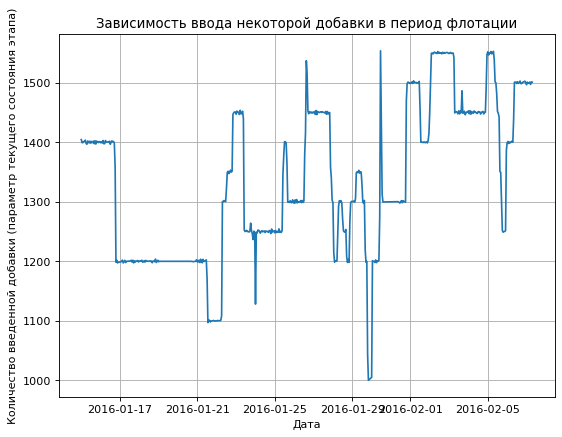

In [57]:
plt.figure(figsize=(8, 6), dpi=80)
plt.grid(True)
plt.plot(gold_train_1.loc[:500,'date'], gold_train_1.loc[:500,'rougher.state.floatbank10_e_air'])
plt.xlabel('Дата')
plt.ylabel('Количество введенной добавки (параметр текущего состояния этапа)')
plt.title('Зависимость ввода некоторой добавки в период флотации')
plt.show()

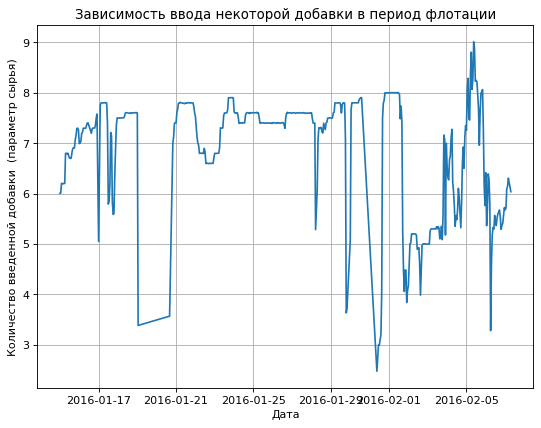

In [58]:
plt.figure(figsize=(8, 6), dpi=80)
plt.grid(True)
plt.plot(gold_train_1.loc[:500,'date'],
         gold_train_1.loc[:500,'rougher.input.floatbank11_xanthate'])
plt.xlabel('Дата')
plt.ylabel('Количество введенной добавки  (параметр сырья)')
plt.title('Зависимость ввода некоторой добавки в период флотации')
plt.show()

Как-то не заметно опредеелнных зависимостей - где-то со временем никаких изменений и не было, а где-то штормило прямо конкретно. Ну, в принципе линейная интерполяция просто построит линию между аргументами с известными значениями и на этой линии отметит значение искомого аргумента. Все же попробуем.


In [59]:
gold_train_2 = gold_train.copy()
gold_train_2['rougher.state.floatbank10_e_air'] =\
gold_train_2['rougher.state.floatbank10_e_air'].interpolate()

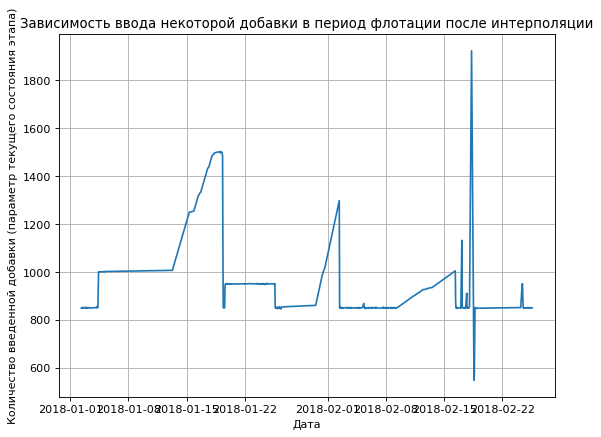

In [60]:
plt.figure(figsize=(8, 6), dpi=80)
plt.grid(True)
plt.plot(gold_train_2.loc[9800:10600,'date'],
         gold_train_2.loc[9800:10600,'rougher.state.floatbank10_e_air'])
plt.xlabel('Дата')
plt.ylabel('Количество введенной добавки (параметр текущего состояния этапа)')
plt.title('Зависимость ввода некоторой добавки в период флотации после интерполяции')
plt.show()

Выглядит не совсем естественно (у реальных данных разброс фактически в течение дня(по крайней мере маленького срока) может скакнуть от 500 до 1900 фактически - этот кусок сразу выделяется)... Из-за того, что у нас большие куски, где значения для соседних точек неопределены, скорее всего от пропусков все же просто придется избавиться. Может показаться, что здесь стоит использовать группировку по датам (без часов и т.п.) а потом подставлять среднее по дате в пропуски, но по факту у нас как бы из-за пропусков "идущих вподряд", выпадают целые дни...

In [61]:
gold_train_3 = gold_train.copy()
gold_train_3['date_without_time'] = gold_train_3['date'].dt.date
#gold_full.groupby('date_date')[gold_full.columns].mean()
gold_train_3['date_without_time'].nunique()


657

Получаем, что из 14 с лишним тысяч строк у нас 657 уникальных дней - следовательно, земеры идут почти каждый час. А у нас число пропусков вподряд яввно достигает больше 24, т.е. замеров параметра может не быть больше суток (датчик сломался или еще что-то там), тогда и теория с заполнением средним по дню тоже как-то отпадает.

 Так как ни к чему толковому мы не приходим - пользуемся подстановкой предыдущего значения в текущее (пропущенное). В конце концов датафреймы у нас и так большие. Теперь наш основной обучающий датафрейм - gold_train_4. Соответствующее имя дадим и тестовому.

In [62]:
gold_train_4 = gold_train.copy()

In [63]:
for col in gold_train_4.columns:
    gold_train_4[col] = gold_train[col].ffill()
    
gold_train_4.isna().sum()
gold_train_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        14149 non-null  datetime64[ns]
 1   final.output.recovery                       14149 non-null  float64       
 2   primary_cleaner.input.sulfate               14149 non-null  float64       
 3   primary_cleaner.input.depressant            14149 non-null  float64       
 4   primary_cleaner.input.feed_size             14149 non-null  float64       
 5   primary_cleaner.input.xanthate              14149 non-null  float64       
 6   primary_cleaner.state.floatbank8_a_air      14149 non-null  float64       
 7   primary_cleaner.state.floatbank8_a_level    14149 non-null  float64       
 8   primary_cleaner.state.floatbank8_b_air      14149 non-null  float64       
 9   primar

In [64]:
gold_test_4 = gold_test.copy()
gold_test_4.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [65]:
#gold_test_4 = gold_test_4.drop(['date'], axis=1)
for col in gold_test_4.columns:
    gold_test_4[col] = gold_test_4[col].ffill()

gold_test_4.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [66]:
gold_train_4.shape

(14149, 55)

Пропуски заполнены, таким образом удалось избежать потери данных.

## Анализ данных

### Изменение концентрации металлов

Этот этап проведем на полном датасете, т.к. из обучающего и тестового мы многое удалили.

В принципе, чтобы понять, что происходило с концентрацией металлов именно по этапам (посмотрим по всем, включая сырье) должно хватить средних значений. Поэтому найдем их для конкретного этапа и металла (млжет стоит смотреть металлы в общем, но это нетрудно сложить из 3 составляющих).

In [67]:
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19438 non-null  float64       
 2   final.output.concentrate_pb                         19438 non-null  float64       
 3   final.output.concentrate_sol                        19228 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19438 non-null  float64       
 7   final.output.tail_pb                                19338 non-null  float64       
 8   final.

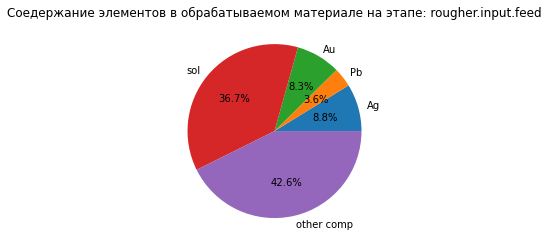

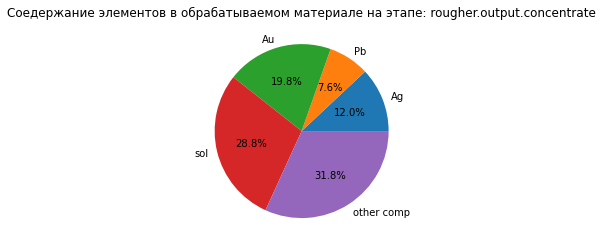

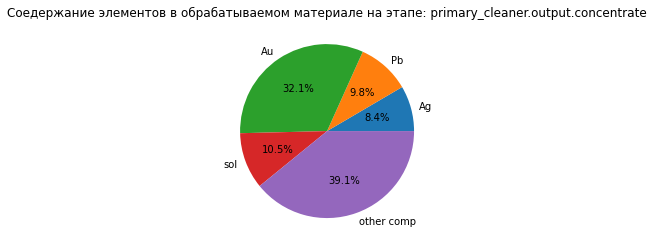

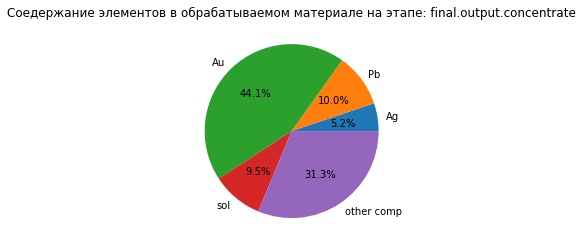

[rougher.input.feed_ag      8.794927
 rougher.input.feed_pb      3.598085
 rougher.input.feed_au      8.266097
 rougher.input.feed_sol    36.695114
 dtype: float64,
 other_comp    42.645776
 dtype: float64,
 rougher.output.concentrate_ag     11.994759
 rougher.output.concentrate_pb      7.606272
 rougher.output.concentrate_au     19.772000
 rougher.output.concentrate_sol    28.805571
 dtype: float64,
 other_comp    31.821397
 dtype: float64,
 primary_cleaner.output.concentrate_ag      8.442408
 primary_cleaner.output.concentrate_pb      9.829530
 primary_cleaner.output.concentrate_au     32.119400
 primary_cleaner.output.concentrate_sol    10.489499
 dtype: float64,
 other_comp    39.119162
 dtype: float64,
 final.output.concentrate_ag      5.168470
 final.output.concentrate_pb      9.978895
 final.output.concentrate_au     44.076513
 final.output.concentrate_sol     9.501224
 dtype: float64,
 other_comp    31.274898
 dtype: float64]

In [68]:
feed_conc = gold_full[['date',
                       'rougher.input.feed_ag',
                      'rougher.input.feed_pb',
                      'rougher.input.feed_au',
                      'rougher.input.feed_sol']].copy()
rougher_conc = gold_full[['date',
                          'rougher.output.concentrate_ag',
                          'rougher.output.concentrate_pb',
                          'rougher.output.concentrate_au',
                          'rougher.output.concentrate_sol']].copy()
primary_cleaner_conc = gold_full[['date',
                                  'primary_cleaner.output.concentrate_ag',
                                  'primary_cleaner.output.concentrate_pb',
                                  'primary_cleaner.output.concentrate_au',
                                  'primary_cleaner.output.concentrate_sol']].copy()
final_conc = gold_full[['date',
                        'final.output.concentrate_ag',
                        'final.output.concentrate_pb',
                        'final.output.concentrate_au',
                        'final.output.concentrate_sol']].copy()

stage_conc = [feed_conc, rougher_conc, primary_cleaner_conc, final_conc]
means_conc = []
#fig, axs = plt.plot()
for frame in stage_conc:
    stage_means = frame.mean()
    means_conc.append(stage_means)
    others_comp = (100-sum(stage_means))
    means_conc.append(pd.Series({'other_comp':others_comp}))
    stage_means = pd.concat([stage_means, pd.Series({'other_comp':others_comp})])
    frame = frame.drop(['date'], axis=1)
    plt.pie(stage_means,
            labels=['Ag', "Pb", 'Au', 'sol', 'other comp'], autopct='%1.1f%%')
    plt.title(f'Соедержание элементов в обрабатываемом материале на этапе: {str(frame.columns[0])[:-3]}')
    plt.show()
means_conc


Очевидный и самый важный для нас факт - это рост концентрации золота (по факту за счет очищения от примесей) на каждом этапе. Значит весь техпроцесс оправдан. Также видно, что в целом концентрация свинца тоже повышается (т.е. видно, что от него мы как бы не избавляемся) на пару процентов, кроме последенй очистки, где она фактически не изменилась. Концентрация серебра после флотации повышается, однако 2 псоледующие очистки помогают его снизить. 

### Исследование размеров гранул сырья

Данный вопрос рассмотрим, как и сказано в задании на двух выборках, с которыми будет взаимодействовать модель.

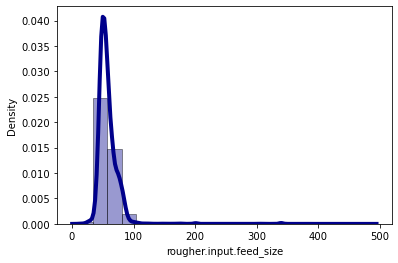

In [69]:
#gold_train_1.plot(kind='hist', y='rougher.input.feed_size', bins=25, range=(0, 200), grid=True)
sns.distplot(gold_train_1['rougher.input.feed_size'], hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

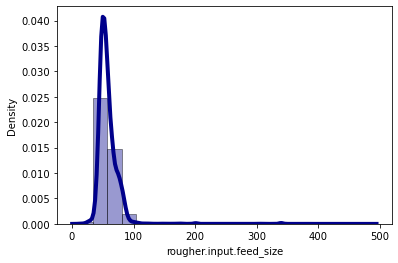

In [70]:
#gold_test_1.plot(kind='hist', y='rougher.input.feed_size', bins=25, range=(0, 200), grid=True)
sns.distplot(gold_test_1['rougher.input.feed_size'], hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

Судить о схожести распределений всегда непросто. Данный случай в принципе не исключение: видно что средние могли бы быть максимально близко, если б у тестовой выборкИ не присутсвовало так много значений в интервале от 40 до 50. В целом распределения несколько напоминают нормальные но если посмотреть на частоты в большем масштабе (как минимум для тренировочного датасета), будут видны выбросы. Очень крупные гранулы имеют место - это факт

In [71]:
gold_train_1['rougher.input.feed_size'].describe()

count    12679.000000
mean        58.414412
std         20.441275
min          9.659576
25%         48.721041
50%         54.651129
75%         63.719220
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [72]:
gold_test_1['rougher.input.feed_size'].describe()

count    12679.000000
mean        58.414412
std         20.441275
min          9.659576
25%         48.721041
50%         54.651129
75%         63.719220
max        484.967466
Name: rougher.input.feed_size, dtype: float64

Хоты вот по кол-ым оценкам уже заметно, что большинство показателей близко к друг другу (можно, конечно, пойти дальше и проверить средние на равенство, но этого вроде не требуется).
Максимальные значения - высокие (это было заметно на гистограммах), но не превышают средние и стандартное отклонение на несколько порядков, соответсвенно, считать их неинформативными аномалиями не станем.

In [73]:
huge_feed_size_train = gold_train_1.loc[gold_train_1['rougher.input.feed_size'] > 200]
huge_feed_size_test = gold_test_1.loc[gold_test_1['rougher.input.feed_size'] > 200]
huge_feed_size_train

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
3822,2016-07-24 20:59:59,75.970054,161.870102,5.933739,7.090000,0.892548,1604.854533,-499.752507,1598.925128,-499.376023,...,19.961226,-400.031109,10.049537,-400.051057,10.075446,-403.132817,5.069262,-399.842160,22.957628,-499.893416
3823,2016-07-24 21:59:59,75.176570,166.215091,6.019960,7.090000,0.882270,1603.482566,-500.094262,1600.032554,-499.760869,...,19.961526,-399.466202,10.078152,-399.626030,9.924182,-401.918437,5.056349,-400.339648,23.026902,-500.377175
3824,2016-07-24 22:59:59,72.377504,164.728297,5.946583,7.090000,0.909782,1600.246151,-499.000434,1599.664611,-500.476636,...,19.974082,-400.059471,10.073479,-399.484238,10.085450,-396.352199,5.043436,-400.047765,23.009404,-498.765393
3825,2016-07-24 23:59:59,74.283799,160.037160,5.974965,7.090000,0.894223,1599.972130,-500.822268,1596.592688,-499.888768,...,20.077289,-400.008470,10.050483,-399.616687,10.002298,-399.176719,5.030524,-401.203124,22.942014,-501.415173
3826,2016-07-25 00:59:59,74.234284,162.553492,5.980691,7.090000,0.884435,1601.542481,-499.583747,1599.383250,-500.026651,...,19.932451,-400.270080,10.004813,-399.938714,10.118624,-399.417707,5.017611,-399.887825,22.940244,-499.361545
3827,2016-07-25 01:59:59,73.153374,159.251626,5.979012,7.090000,0.902221,1599.638521,-500.556931,1601.094875,-499.798251,...,19.985371,-399.987732,9.906012,-400.681902,9.961733,-399.080118,5.004698,-400.001607,22.996275,-498.125722
3828,2016-07-25 02:59:59,70.954202,156.835921,6.076951,7.090000,0.886374,1600.578234,-499.432632,1599.616041,-500.347299,...,20.015916,-399.084214,10.041267,-397.091455,9.966870,-402.936854,4.991786,-400.105465,23.021417,-500.835361
3829,2016-07-25 03:59:59,73.677505,148.212495,5.949498,7.090000,0.901128,1599.022355,-500.326269,1603.090707,-499.734432,...,19.961428,-400.532357,10.016105,-400.236140,9.981473,-399.100501,4.979364,-399.630059,23.014694,-500.332044
3830,2016-07-25 04:59:59,73.009166,139.583709,6.000084,7.090000,0.922292,1596.433895,-500.671876,1598.237046,-499.477181,...,20.056256,-400.606743,9.993424,-401.495623,10.132152,-398.596086,4.972851,-399.407966,23.003439,-500.012170
3831,2016-07-25 05:59:59,73.403823,139.935733,6.265825,7.090000,0.893066,1603.855631,-501.455054,1600.870117,-499.377572,...,20.066647,-398.847445,9.975633,-398.755118,9.894055,-401.591623,4.968069,-399.481812,23.031086,-500.187366


Не так много строк, которые отражают загрузку материалов с очень крупными гранулами.

### Определение суммарной концентрации веществ

Посмотрим, что происходило с выходными концентрациями золота по дням.

In [74]:
gold_full['only_days'] = gold_full['date'].dt.date

In [75]:

feed_conc['sum_conc'] = feed_conc['rougher.input.feed_ag'] + feed_conc['rougher.input.feed_pb'] +\
                          feed_conc['rougher.input.feed_au'] + feed_conc['rougher.input.feed_sol']

rougher_conc['sum_conc'] = rougher_conc['rougher.output.concentrate_ag'] + rougher_conc['rougher.output.concentrate_au'] +\
                             rougher_conc['rougher.output.concentrate_pb'] + rougher_conc['rougher.output.concentrate_sol']

primary_cleaner_conc['sum_conc'] = primary_cleaner_conc['primary_cleaner.output.concentrate_ag'] +\
                                                   primary_cleaner_conc['primary_cleaner.output.concentrate_au'] +\
                                                   primary_cleaner_conc['primary_cleaner.output.concentrate_pb'] +\
                                                   primary_cleaner_conc['primary_cleaner.output.concentrate_sol']

final_conc['sum_conc'] = final_conc['final.output.concentrate_ag'] + final_conc['final.output.concentrate_au'] +\
                     final_conc['final.output.concentrate_pb'] + final_conc['final.output.concentrate_sol']


Тогда суммарная концентрация веществ по этапам:

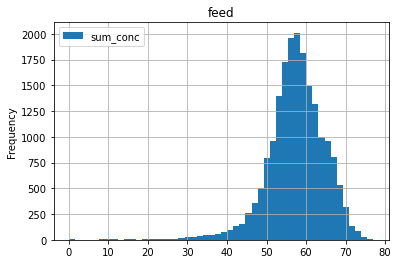

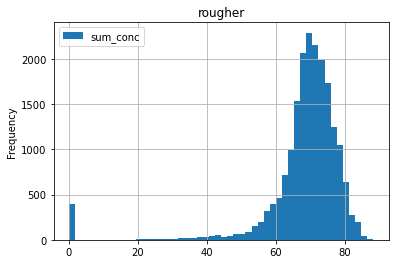

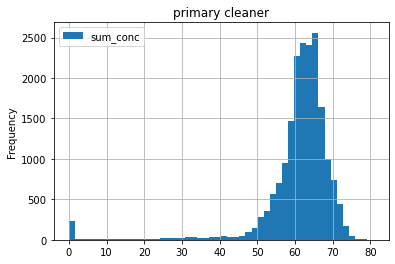

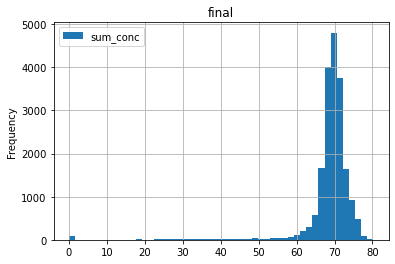

In [76]:
stage_name = ['feed', 'rougher', 'primary cleaner', 'final']
i = 0
for df in stage_conc:
    df.plot(kind='hist', y='sum_conc', bins=50, grid=True)
    plt.title(stage_name[i])
    i += 1

Выбросы реально есть: выше 100 значения мы не наблюдаем, а вот подозрительно низкие концентрации (близко или равные 0 есть). Возьмем границу выбросов равной 1 (в приниципе такое значение теоретически может быть, но нам, думаю, не повердит то, что выкинем несколько таковых).

In [77]:
feed_emissions = feed_conc.loc[feed_conc['sum_conc'] < 1]
rougher_emissions = rougher_conc.loc[rougher_conc['sum_conc'] < 1]
primary_cleaner_emissions = primary_cleaner_conc.loc[primary_cleaner_conc['sum_conc'] < 1]
final_emissions = final_conc.loc[final_conc['sum_conc'] < 1]

emissions_ful = pd.concat([feed_emissions, rougher_emissions, primary_cleaner_emissions, final_emissions])
#emissions = [feed_emissions, rougher_emissions, primary_cleaner_emissions, final_emissions]

print("Число дат, когда были появлялись выбросы:", emissions_ful.duplicated(subset=['date']).sum())

Число дат, когда были появлялись выбросы: 14


Количетсво выбросов в целом.

In [78]:
emissions_ful = emissions_ful.drop_duplicates(subset=['date'])
print(len(emissions_ful))

717


Проверям количество строк при удалении выбросов, чтобы нигде не ошибиться.

In [79]:
print(gold_train_4.shape[0] + gold_test_4.shape[0] - len(emissions_ful))
print(gold_full.shape[0] - len(emissions_ful))

18722
18722


In [80]:
for el in emissions_ful['date']:
    gold_train_4 = gold_train_4.loc[gold_train_4['date'] != el]
        
for el in emissions_ful['date']:
    gold_test_4 = gold_test_4.loc[gold_test_4['date'] != el]

In [81]:
print(gold_train_4.shape[0] + gold_test_4.shape[0])

18722


При проверке на очередной итерации были обнаружены несостыковки в размерах а точнее 14 лишних значений). После чего объединил выборки при помощи concat, все вроде исправилось и  сравнялось.

In [82]:
gold_train_4 = gold_train_4.drop(['date'], axis=1).reset_index(drop=True)

In [83]:
gold_test_4 = gold_test_4.drop(['date'], axis=1).reset_index(drop=True)

Разброс непредсказуемый, безусловно, но в общем виде можно с легкостью сказать, что концентрация после флотации аппроксимируется прямой равной 20, а после всех стадий очистки прямой равной 45. Что полностью подтверждают расчеты в п. 2.1.

 Заметно, что у финальной концентрации золота есть долготянущийся влево хвост, что не очень хорошо. Получается, что в определенных случаях после всех стадий очистки могут быть случаи, когда концетрация золота довольно низкая.

## Модель

### Преобразование данных

Перед построением модели преобразуем данные соответствующим образом.

In [84]:
train_f = gold_train_4.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
train_rougher_t = gold_train_4['rougher.output.recovery']
train_final_t = gold_train_4['final.output.recovery']

test_f = gold_test_4.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
test_rougher_t = gold_test_4['rougher.output.recovery']
test_final_t = gold_test_4['final.output.recovery']

Не забываем про масштабирование.

In [85]:
scaler = StandardScaler()
scaler.fit(train_f)
train_f_sc = scaler.transform(train_f)
test_f_sc = scaler.transform(test_f)


In [86]:
print(train_f_sc.shape)
print(test_f_sc.shape)

(13599, 52)
(5123, 52)


### Функция симметричного среднего абсолютного процентного отклонения

In [108]:
def sMAPE(y, y_pred):
    sum_part = sum((2 * abs(y - y_pred)) / (abs(y) + abs(y_pred)))
    return 100 * sum_part / len(y)

In [109]:
smape_score = make_scorer(sMAPE, greater_is_better=True)
smape = {'smape': smape_score}

Перейдем к обучению моделей

Для экстраполяции данных на неизвестные условия, как известно, подходит только регрессия (деревья работают "в пределах того, на чем они обучены"). Однако здесь, учитывая, что в задании было указано обучить моделИ и то, что мы никакую экстраполяцию дальше делать не должны их тоже применим.

Обычное одинокое дерево смотреть не будем. Начнем сразу с ансамбля деревьев.

### Модель рандомного леса

In [89]:
models = []
for  est in range(5, 20, 3):
    for depth in range(2, 5):
            #for n_feature  in range(5, df1.shape[1]-1):
        model_forest1 = RandomForestRegressor(max_depth=depth, n_estimators=est,
                                             random_state=12345)
        models.append(model_forest1)

In [90]:
best_model_rforest_1 = None
best_model_rforest_2 = None
best_score_r_forest_1 = 100
best_score_r_forest_2 = 100

for m in tqdm(models):
    scores_1 = []
    scores_2 = []
    scores_1 = cross_val_score(m, train_f_sc, train_rougher_t, cv=5, scoring=smape_score)
    scores_1_final = pd.Series(scores_1).mean()
    scores_2 = cross_val_score(m, train_f_sc, train_final_t, cv=5, scoring=smape_score)
    scores_2_final = pd.Series(scores_2).mean()
    if scores_1_final < best_score_r_forest_1:
        best_score_r_forest_1 = scores_1_final
        best_model_rforest_1 = m
    if scores_2_final < best_score_r_forest_2:
        best_score_r_forest_2 = scores_2_final
        best_model_rforest_2 = m
        
best_final_score = best_score_r_forest_1 * 0.25 + best_score_r_forest_2 * 0.75
print(best_model_rforest_1)
print(best_model_rforest_2)
print('Result_SMAPE by randForest', best_final_score)


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [02:35<00:00, 10.40s/it]

RandomForestRegressor(max_depth=4, n_estimators=8, random_state=12345)
RandomForestRegressor(max_depth=2, n_estimators=17, random_state=12345)
Result_SMAPE by randForest 8.512899546490647


Оценка неплохая, но и не очень низкая.

Перейдем к регресси и посмотрим некоторые ее варианты.

###  Регрессионные модели

In [93]:
# простая ЛИНЕЙНАЯ РЕГРЕССИЯ
temp_m_lin_reg = LinearRegression()
scores_1 = []
scores_2 = []
scores_1 = cross_val_score(temp_m_lin_reg, train_f_sc, train_rougher_t, cv=5, scoring=smape_score) 
scores_2 = cross_val_score(temp_m_lin_reg, train_f_sc, train_final_t, cv=5, scoring=smape_score)
final_score = pd.Series(scores_1).mean() * 0.25 + pd.Series(scores_2).mean() * 0.75

print('Result_SMAPE by linRegression:', final_score)

Result_SMAPE by linRegression: 10.091070510181288


Модель уступает лучшим показателем (где глубина дерева побольше 5 и само число деревьев немаленькое) моделей рандомного  леса.

In [94]:
alphas = list(np.logspace(-2, 2, 10))
models_elastic = []
l1_ratio = list(np.linspace(0, 1, 3))

In [95]:
for l1 in l1_ratio:
    for alpha in alphas:
        m_r = ElasticNet(max_iter=1000, alpha=alpha, l1_ratio=l1, random_state=12345)
        models_elastic.append(m_r)

In [96]:
best_model_elastic_1 = None
best_model_elastic_2 = None
best_score_elastic_1 = 100
best_score_elastic_2 = 100

for m in tqdm(models_elastic):
    scores_1 = []
    scores_2 = []
    scores_1 = cross_val_score(m, train_f_sc, train_rougher_t, cv=5, scoring=smape_score)
    scores_1_final = pd.Series(scores_1).mean()
    scores_2 = cross_val_score(m, train_f_sc, train_final_t, cv=5, scoring=smape_score)
    scores_2_final = pd.Series(scores_2).mean()
    if scores_1_final < best_score_elastic_1:
        best_score_elastic_1 = scores_1_final
        best_model_elastic_1 = m
    if scores_2_final < best_score_elastic_2:
        best_score_elastic_2 = scores_2_final
        best_model_elastic_2 = m
        
best_final_score = best_score_elastic_1 * 0.25 + best_score_elastic_2 * 0.75
print(best_model_elastic_1)
print(best_model_elastic_2)
print('Result_SMAPE by elasticNet:', best_final_score)


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:04<00:00,  2.16s/it]

ElasticNet(alpha=0.5994842503189409, l1_ratio=0.0, random_state=12345)
ElasticNet(alpha=0.5994842503189409, l1_ratio=1.0, random_state=12345)
Result_SMAPE by elasticNet: 8.326924548544605


Обратим внимание, что для предсказания коэффициента после флотации модель показала лучшие результаты с регуляризацией Тиханова (без лассо), а после финальной очистки - с лассо регрессией.

###  Градиентный бустинг 

In [100]:
models_gbd = []
for est in range(50, 251, 200):
    for l_r in list(np.logspace(7.5e-4, 1, 5)):
        for max_depth in range(1, 6, 2):
            gbd = GradientBoostingRegressor(n_estimators=est, max_depth=max_depth,
                                            loss='huber', max_features='log2',
                                            learning_rate=l_r, warm_start=True, random_state=12345)
            models_gbd.append(gbd)

In [101]:
best_model_gbd1 = None
best_model_gbd2 = None
best_score_gbd1 = 100
best_score_gbd2 = 100

for m in tqdm(models_gbd):
    scores_1 = []
    scores_2 = []
    scores_1 = cross_val_score(m, train_f_sc, train_rougher_t, cv=5, scoring=smape_score)
    scores_1_final = pd.Series(scores_1).mean()
    scores_2 = cross_val_score(m, train_f_sc, train_final_t, cv=5, scoring=smape_score)
    scores_2_final = pd.Series(scores_2).mean()
    if scores_1_final < best_score_gbd1:
        best_score_gbd1 = scores_1_final
        best_model_gbd1 = m
    if scores_2_final < best_score_gbd2:
        best_score_gbd2 = scores_2_final
        best_model_gbd2 = m

best_final_score = best_score_sgd_1 * 0.25 + best_score_sgd_2 * 0.75
print(best_model_gbd1)
print(best_model_gbd2)
print('Result_SMAPE by gradBoosting', best_final_score)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [17:56<00:00, 35.88s/it]

GradientBoostingRegressor(learning_rate=1.0002302850208247, loss='huber',
                          max_depth=1, max_features='log2', n_estimators=50,
                          random_state=12345, warm_start=True)
Result_SMAPE by gradBoosting 10.013449768987408


### Стохастический градиентный спуск

In [105]:
models_sgd = []
for alpha in alphas:
    for i in range(20, 220, 50): # we need change up boundary for using
        m_r = SGDRegressor(max_iter=i, alpha=alpha, penalty='elasticnet', n_iter_no_change=30,
                               eta0=0.001, learning_rate='optimal',
                               tol=1e-3, l1_ratio=0, random_state=12345, warm_start=True)
        models_sgd.append(m_r)

In [106]:
best_model_sgd_1 = None
best_model_sgd_2 = None
best_score_sgd_1 = 100
best_score_sgd_2 = 100

for m in tqdm(models_sgd):
    scores_1 = []
    scores_2 = []
    scores_1 = cross_val_score(m, train_f_sc, train_rougher_t, cv=5, scoring=smape_score)
    scores_1_final = pd.Series(scores_1).mean()
    scores_2 = cross_val_score(m, train_f_sc, train_final_t, cv=5, scoring=smape_score)
    scores_2_final = pd.Series(scores_2).mean()
    if scores_1_final < best_score_sgd_1:
        best_score_sgd_1 = scores_1_final
        best_model_sgd_1 = m
    if scores_2_final < best_score_sgd_2:
        best_score_sgd_2 = scores_2_final
        best_model_sgd_2 = m
        
best_final_score = best_score_sgd_1 * 0.25 + best_score_sgd_2 * 0.75
print(best_model_sgd_1)
print(best_model_sgd_2)
print('Result_SMAPE by stochasticDescent:', best_final_score)


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [02:38<00:00,  3.96s/it]

SGDRegressor(alpha=1.6681005372000592, eta0=0.001, l1_ratio=0,
             learning_rate='optimal', max_iter=170, n_iter_no_change=30,
             penalty='elasticnet', random_state=12345, warm_start=True)
SGDRegressor(alpha=1.6681005372000592, eta0=0.001, l1_ratio=0,
             learning_rate='optimal', max_iter=170, n_iter_no_change=30,
             penalty='elasticnet', random_state=12345, warm_start=True)
Result_SMAPE by stochasticDescent: 13.381509428013057


Лучшая модель в нашем случае ElasticNet, и это весьма неплохо: с помощью неё можно и экстраполировать данные.

In [102]:
best_model_elastic_1.fit(train_f_sc, train_rougher_t)
pred_rougher_recovery_elastic = best_model_elastic_1.predict(test_f_sc)
best_model_elastic_2.fit(train_f_sc, train_final_t)
pred_final_recovery_elastic = best_model_elastic_2.predict(test_f_sc)

res_smape_test = 0.25 * sMAPE(test_rougher_t, pred_rougher_recovery_elastic) +\
                0.75 * sMAPE(test_final_t, pred_final_recovery_elastic)
print(res_smape_test)

6.551793317645016


В целом такой результат можно посчитать удовлетворительным.

In [110]:
dummy_regr = DummyRegressor(strategy="mean")

dummy_regr.fit(train_f_sc, train_rougher_t)
pred_rougher_recovery_dummy = dummy_regr.predict(test_f)
dummy_regr.fit(train_f_sc, train_final_t)
pred_final_recovery_dummy = dummy_regr.predict(test_f)

res_smape_test = 0.25 * sMAPE(test_rougher_t, pred_rougher_recovery_dummy) +\
                0.75 * sMAPE(test_final_t, pred_final_recovery_dummy)
print(res_smape_test)

7.779296321657126


## Вывод

В процессе работы над проектом были подробно проанализированы файлы с обучающей и тестовой выборкой. Установлено, что в тестовой выборке отсутсвует ряд признаков - возможно они узнаются в конце проведения эксперимента (они являются откликами от факторов эксперимента), на основе этого данные признаки в обучении тоже не используются. Целевые признаки внесены в тестовую выборку из основного датасета. По формуле определения эффективности установлено MAE для обучающей выборке, которое примерно равно 18.

Выяснено, что от этапа к этапу концентрация золота в материале повышается, что говорит в целомм об эффективности технологического процесса.

Обучено несколько моделей, более менее стабильные результаты при кросс-валидации и тестах дает регрессионная модель (Elastic_Net) с регулиризацеий (sMAPE около 8.3). Результат на тесте ниже константного примерно на 16%, что не является выдающимся значением, однако отражает эффективность модели. Это позволит в дальнейшем делать экстрапаляцию, что выгодным образом выделяет модель для исследуемого случая.
